#### Обзор данных

Откроем датасет и просмотрим последние пять строк, так узнаем общее количество записей в датасете и посмтрим на представление данных последних пяти строк

In [1]:
#!gdown 1DxuW5N5GTBLVRaefTys_HglSE6z010K2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Получили общую информацию о датасете

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Заметили, что:

- дата публикации (`first_day_exposition`) представлена в формате object
- столбец, показывающий количество этажей в доме (`floors_total`) представлен в формате float64
- число балконов (`balcony`) представленно в формате float64
- есть небольшое количество пропусков в названиях населённого пункта (`locality_name`)
- есть много пропусков в расстоянии до ближайшего:
 - парка (`parks_nearest`)
 - водоема (`ponds_nearest`)
 - аэропорта (`airports_nearest`)
- судя по количеству записей указывающих количество дней экспозиции (`days_exposition`) подавляющее большинство объявлений завершено

#### Гистограмма всех числовых значений

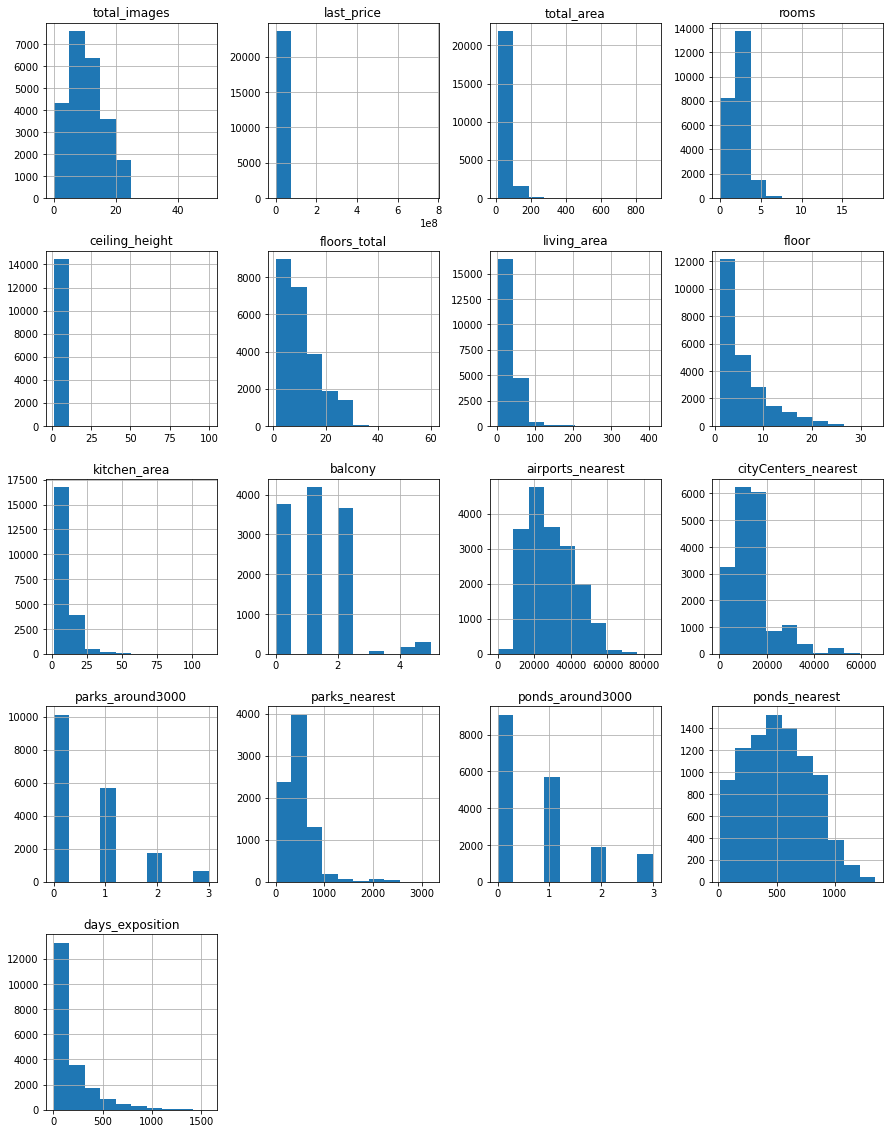

In [6]:
data.hist(figsize=(15, 20));

#### Обзор числовых значений

In [7]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [8]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Больше всего продаются 1-комнатные квартиры

#### Обзор пропущенных значений

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Самое большое количество пропусков в столбце (20924), вероятно из-за неправильного формата данных (object, а должен быть булевым типом), не везде указана высота потолков, площадь жилой зоны, кухни. Также примерно в половине объявлений отсутствует указанное количество балконов, 49 объявлений с не указанным населенным пунктом. Большое количество пропусков в расстояниях до парков, аэропортов, водоемов и в их числе в радиусе 3км.

Построили гистограмму для всех числовых значений датасета, чтобы получить графическое представление о некорых данных их встречаемости.

In [10]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

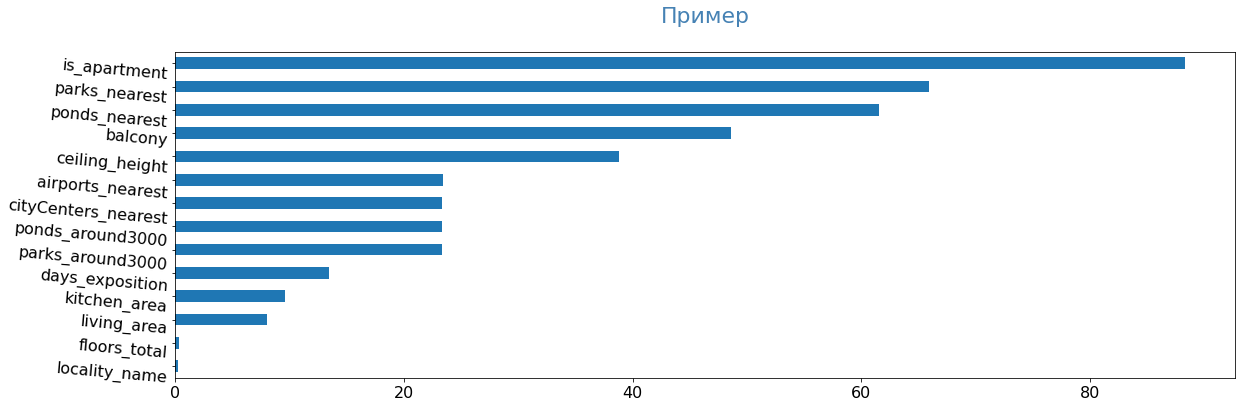

In [11]:
pass_value_barh(data)

Далее, ознакомились со столбцом с булевым типом указывающий на апартаменты. Пытаясь понять природу самого большого количества пропусков в датасете, изучили столбец `'is_apartment'`, вывели уникальные значения:

In [12]:
# Количество уникальных значений столбца 'is_apartment'
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Выяснили сколько раз встречаются уникальные значения:

In [13]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Убедились, что все остальные пропущенные значения представляют собой незаполненые числовые значения.

#### Вывод

В датасете представлено 23699 записей в 22 двух столбцах 14 из которых содержат в себе пропуски, самой большой колонкой по количеству пропусков является колонка указывающая на апартаменты в неправильном для булева типа формате, она содержит в себе значения булева типа True и False в большинстве своем в этом столбце вместо значений стоят пропуски, вероятно из-за того, что пользователи не указали их когда заполняли объявление на сайте Яндекс.Недвижимости, исхдим из того что большая часть пользователей у которых квартира не является апартаментами просто пропустили этот пункт при объявлении. Исходя из гистограммы всех числовых значений большинство квартир имеют до 3 комнат (по числовому представлению данных в среднем 2 комнаты), реже 5 в домах до 10 этажей, а также продаются не более 400 дней, с момента публикации до снятия объявления.

Очень многие столбцы имеют неправильный формат данных.

### Предобработка данных

#### Обработка аномалий и редких, выбивающихся значений

##### Обработка аномалий в высоте потолков

Столбец `ceiling_height` имеет в себе 9195 пропусков, это почти 38 процентов в этом столбце, игнорировать такое количество нельзя, для начала обработки этого столбца изобразили диаграмму размаха значений этой колонки:

<AxesSubplot:>

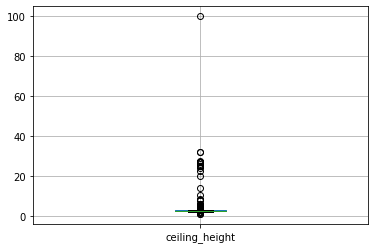

In [14]:


# Построим боксплот без ограничений по оси y, высоте потолков

data.boxplot('ceiling_height')

<AxesSubplot:>

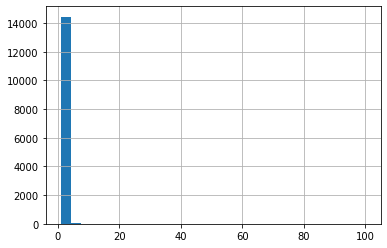

In [15]:
data['ceiling_height'].hist(bins=30)

Исходя из графиков можно сказать, что столбец содержит в себе выбросы, вероятно связано это с тем, что пользователи указали 25 метров высоту потолка вместо 2.5 м. Написали функцию которая делит значение на 10 если высота потолков выше 10 метров, те строки которые и в после этого не утратили аномальные свойства в столбце `ceiling_height` мы удалим из датасета, в любом случае их количество пренебрижительно мало

In [16]:
def calc_ceiling_height(numb):
    if numb > 10:
        return numb / 10
    else:
        return numb

In [17]:
data['ceiling_height'] = data.loc[~data['ceiling_height'].isna(), 'ceiling_height'].apply(calc_ceiling_height)

После арифметических операций все равно остались квартиры с высотой потолка несколько десятков метров, такие строки мы удалим как редкие и выбивающиеся - аномалии

Также после обработки мы будем рассматривать строки с высотой потолков не менее 2.5м так как в соответствии с положениями о высоте потолков в СНиПах указано минимальное значение в 2.5м. Всего строк мы отбросим около 100 это незначительное количество

Посчитали количество и строк до и после фильтрации:

In [18]:
data['ceiling_height'].count()

14504

In [19]:
data = (
    data
    .loc[(data['ceiling_height'].isna()) |
        (data['ceiling_height'] >= 2.5) &
        (data['ceiling_height'] < 3.5)]
)

In [20]:
data['ceiling_height'].count()

14016

Построили графики после фильтрации чтобы проверить выбросы

<AxesSubplot:>

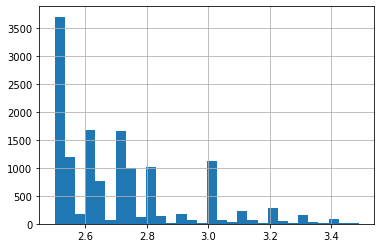

In [21]:
data['ceiling_height'].hist(bins=30)

<AxesSubplot:>

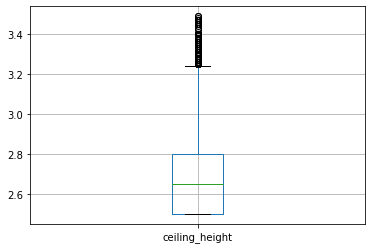

In [22]:
data.boxplot('ceiling_height')

В итоге все равно видны отдельные выбросы на боксплоте, однако таких значений около 2 тысяч, это почти десять процентов от всего датасета, решили оставить эти строки. Медиана на уровне 2.7м

##### Редкие и выбивающиеся значения в общей площади

Обработали столбец общей площади сначала посмотрели на гистограмму и боксплот чтобы оценить выбросы

<AxesSubplot:>

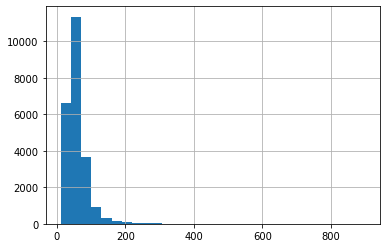

In [23]:
data['total_area'].hist(bins=30)

<AxesSubplot:>

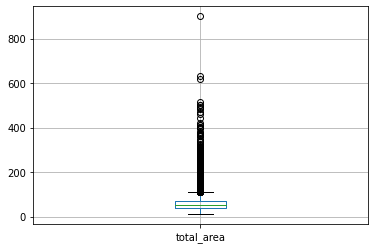

In [24]:
data.boxplot('total_area')

Увидели большое количество выбросов после 200 кв метров общей жилой площади, оставили только строки где не более 200 кв метров общей жилой площади.

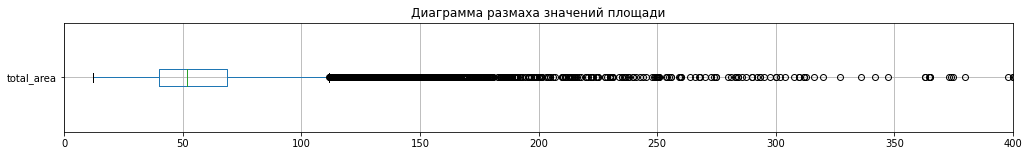

In [25]:
# check
# для примера горизонтальный вид диаграммы размаха

fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

In [26]:
data.query('total_area > 200 or total_area < 23')['total_area'].count()

252

Посчитали количество строк для удаления, число приемлимое - 252 строк

Оставили в датасете строки со значениями в столбце `total_area` не выше 200 и не менее 20 кв м

In [27]:
data = data[(data['total_area'].isna()) | (data['total_area'] <= 200)]

In [28]:
data = data[data['total_area'] > 24]

In [29]:
data['total_area'].count()

22887

Посчитали количество строк в датасете после обработки редких значений, количество записей приемлимое

##### Редкие и выбивающиеся значения в жилой площади

Обработали столбец жилой площади сначала посмотрели на гистограмму и боксплот чтобы оценить выбросы

<AxesSubplot:>

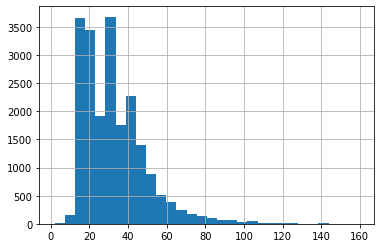

In [30]:
data['living_area'].hist(bins=30)

<AxesSubplot:>

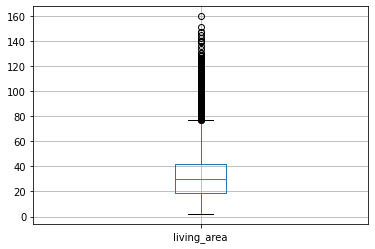

In [31]:
data.boxplot('living_area')

Увидели большое количество выбросов после 100 кв метров жилой площади, оставили только строки где не более 100 и не менее 10 кв метров жилой площади.

In [32]:
data[(data['living_area'] < 10) | (data['living_area'] > 100)]['living_area'].count()

162

Посчитали количество строк для удаления, число приемлимое - 162 строка

Оставим в датасете строки со значениями в столбце `living_area` не выше 100 кв м

##### check nan

In [33]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22887 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22887 non-null  int64  
 1   last_price            22887 non-null  float64
 2   total_area            22887 non-null  float64
 3   first_day_exposition  22887 non-null  object 
 4   rooms                 22887 non-null  int64  
 5   ceiling_height        13873 non-null  float64
 6   floors_total          22805 non-null  float64
 7   living_area           21068 non-null  float64
 8   floor                 22887 non-null  int64  
 9   is_apartment          2668 non-null   object 
 10  studio                22887 non-null  bool   
 11  open_plan             22887 non-null  bool   
 12  kitchen_area          20794 non-null  float64
 13  balcony               11837 non-null  float64
 14  locality_name         22840 non-null  object 
 15  airports_nearest   

In [34]:
#check
data[data['living_area'] > 100]['living_area'].count()

141

In [35]:
# Количество записей до фильтрации
data['living_area'].count()

21068

In [36]:
data = data[(data['living_area'].isna()) | (data['living_area'] <= 100)]

In [37]:
# Количество записей после фильтрации
data['living_area'].count()

20927

In [38]:
# check
data.shape[0]

22746

In [39]:
#check
data[data['living_area'] < 10]['living_area'].count()

21

In [40]:
data = data[(data['living_area'].isna()) | (data['living_area'] >= 10)]

In [41]:
# Количество записей после фильтрации
data['living_area'].count()

20906

Посчитали количество строк в датасете после обработки редких значений, количество записей приемлимое

##### Редкие и выбивающиеся значения в площади кухни

Обработали столбец кухонной площади сначала посмотрели на гистограмму и боксплот чтобы оценить выбросы

<AxesSubplot:>

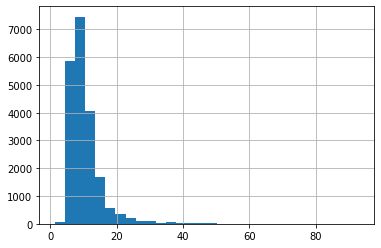

In [42]:
data['kitchen_area'].hist(bins=30)

<AxesSubplot:>

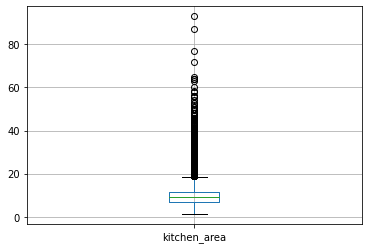

In [43]:
data.boxplot('kitchen_area')

Увидели большое количество выбросов после 30 кв метров кухонной площади, оставили только строки где не более 30 кв метров общей жилой площади. Также оставим строки более 5 метров кухонной площади

In [44]:
data[(data['kitchen_area'] < 5) | (data['kitchen_area'] > 30)]['kitchen_area'].count()

320

Посчитали количество строк для удаления, число приемлимое - 320 строк

Оставим в датасете строки со значениями в столбце `kitchen_area` не выше 30 кв м

In [45]:
data = data[(data['kitchen_area'].isna()) | (data['kitchen_area'] <= 30)]

In [46]:
data = data[(data['kitchen_area'].isna()) | (data['kitchen_area'] >= 5)]

In [47]:
data['kitchen_area'].count()

20317

Посчитали количество строк в датасете после обработки редких значений, количество записей приемлимое

##### Редкие и выбивающиеся значения в этажности дома

Удалили одноэтажные и двухэтажные постройки

In [48]:
data = data[(data['floors_total'].isna()) | (data['floors_total'] > 1)]

##### Редкие и выбивающиеся значения в цене объекта

Обработали столбец цены объекта сначала посмотрели на гистограмму и боксплот чтобы оценить выбросы

<AxesSubplot:>

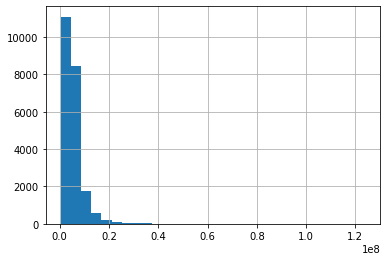

In [49]:
data['last_price'].hist(bins=30)

<AxesSubplot:>

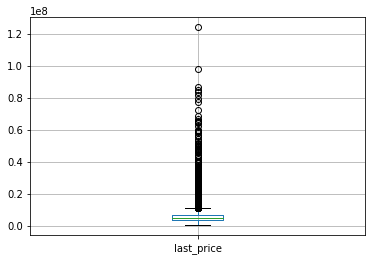

In [50]:
data.boxplot('last_price')

Увидели большое количество выбросов после 20 млн руб за объект, оставили только строки где не более 20 млн руб за объект.

In [51]:
data[data['last_price'] > 20000000]['last_price'].count()

335

Посчитали количество строк для удаления, число приемлимое - 269 строк

Оставим в датасете строки со значениями в столбце `last_price` не более 20 млн руб за объект

In [52]:
data = data[(data['last_price'].isna()) | (data['last_price'] <= 20000000)]

In [53]:
data['last_price'].count()

22048

Посчитали количество строк в датасете после обработки редких значений, количество записей приемлимое

##### Редкие и выбивающиеся значения в количестве комнат

Обработали столбец количество комнат сначала посмотрели на гистограмму и боксплот чтобы оценить выбросы

<AxesSubplot:>

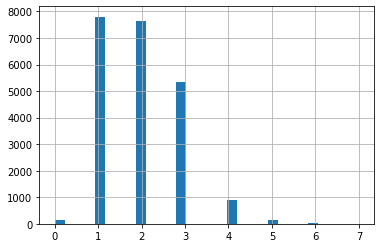

In [54]:
data['rooms'].hist(bins=30)

<AxesSubplot:>

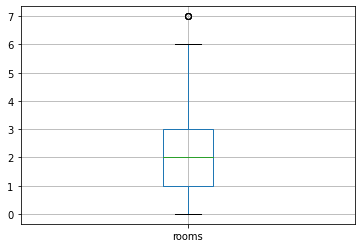

In [55]:
data.boxplot('rooms')

Увидели некоторое количество выбросов после 5 комнат в объекте, оставили только строки где не более 5 комнат в объекте.

In [56]:
# check
data.shape[0]

22048

In [57]:
data[data['rooms'] > 5]['rooms'].count()

23

In [58]:
# check
data.shape[0]

22048

In [59]:
data = data[(data['rooms'].isna()) | (data['rooms'] <= 5)]

In [60]:
data['rooms'].count()

22025

Посчитали количество строк в датасете после обработки редких значений, количество записей приемлимое

##### Редкие и выбивающиеся значения в этажности дома

<AxesSubplot:>

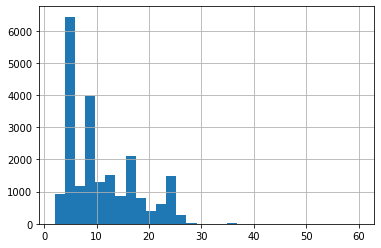

In [61]:
data['floors_total'].hist(bins=30)

Удалим объекта выше 27 этажа:

In [62]:
#check

data['floors_total'].count()

21947

In [63]:
data = data[(data['floors_total'].isna()) | (data['floors_total'] <= 27)]

In [64]:
#check

data['floors_total'].count()

21894

##### Редкие и выбивающиеся значения в продолжительности продажи

Рассмотрели и обработали значения в продолжителньсоти продажи.

Построили гистограмму:

<AxesSubplot:>

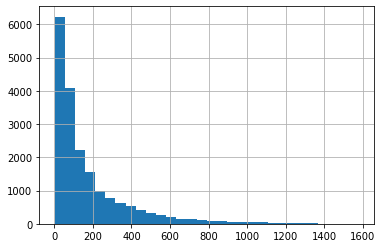

In [65]:
data['days_exposition'].hist(bins=30)

Оставим в датасете объекты с продолжительсностью продажи не более 800 дней:

In [66]:
data = data[(data['days_exposition'].isna()) | (data['days_exposition'] <= 800)]

#### Обработка пропусков

In [67]:
data.query('total_area*0.9 <= (living_area + kitchen_area)').count()

total_images            369
last_price              369
total_area              369
first_day_exposition    369
rooms                   369
ceiling_height          242
floors_total            369
living_area             369
floor                   369
is_apartment             50
studio                  369
open_plan               369
kitchen_area            369
balcony                 163
locality_name           369
airports_nearest        253
cityCenters_nearest     253
parks_around3000        253
parks_nearest           118
ponds_around3000        253
ponds_nearest           125
days_exposition         309
dtype: int64

##### Категоризация классов жилья

Законодательно отличия классов жилья в России не закреплены. Даже среди риелторов и профессионалов рынка нет договорённости об их границах.

Единственный документ, более или менее подробно описывающий разные типы жилья, — «Единая классификация многоквартирных жилых новостроек», составленная экспертами Российской гильдии риелторов и Федерального фонда содействия развитию жилищного строительства. 

Но этот документ не утверждён правительством, официально не принят всеми застройщиками и риелторами, поэтому критерии классов жилья остаются размытыми

Однако, пользуясь Единой классификацией многоквартирных жилых новостроек можно категорезировать классы в имеющимся датасете

In [68]:
'''
Большое дерево условий категоризации конкретного жилья по количеству комнат, общей жилой площади и
столбца с булевым типом "studio"
'''
def categorize_class_house(df):
    if df['rooms'] == 1 or df['rooms'] == 0:
        if df['studio']:
            if df['total_area'] < 28:
                return 'economy'
            elif 28 <= df['total_area'] < 45:
                return 'comfort'
            elif 45 <= df['total_area'] < 60:
                return 'business'
            else:
                return 'elite'
        elif df['total_area'] < 34:
            return 'economy'
        elif 28 <= df['total_area'] < 45:
            return 'comfort'
        elif 45 <= df['total_area'] < 60:
            return 'business'
        return 'elite'
    elif df['rooms'] == 2:
        if df['total_area'] < 50:
            return 'economy'
        elif 50 <= df['total_area'] < 65:
            return 'comfort'
        elif 65 <= df['total_area'] < 80:
            return 'business'
        else:
            return 'elite'
    elif df['rooms'] == 3:
        if df['total_area'] < 65:
            return 'economy'
        elif 65 <= df['total_area'] < 85:
            return 'comfort'
        elif 85 <= df['total_area'] < 120:
            return 'business'
        else:
            return 'elite'
    elif df['rooms'] == 4:
        if df['total_area'] < 85:
            return 'economy'
        elif 85 <= df['total_area'] < 120:
            return 'comfort'
        elif 120 <= df['total_area'] < 250:
            return 'business'
        else:
            return 'elite'
    elif df['rooms'] == 5:
        if df['total_area'] < 100:
            return 'economy'
        elif 100 <= df['total_area'] < 150:
            return 'comfort'
        elif 150 <= df['total_area'] < 350:
            return 'business'
        else:
            return 'elite'
    elif df['rooms'] > 5:
        if df['total_area'] < 150:
            return 'economy'
        elif 150 <= df['total_area'] < 250:
            return 'comfort'
        elif 250 <= df['total_area'] < 450:
            return 'business'
        else:
            return 'elite'

In [69]:
data['class'] = data.apply(categorize_class_house, axis=1)

In [70]:
data['class'].value_counts()

comfort     10466
economy      7463
business     3058
elite         468
Name: class, dtype: int64

Теперь когда получили столбец "класс жилья" можно обработать высоту потолков и заполнить пропуски медианным значением своей категории:

In [71]:
'''
Циклом пробежались по классам жилья, затем сравнили с выбранным классом жилья и через амперсанд взяли пропуск
затем присвоили этому пропуску медианное значение высоты потолков своего класса
''' 
for c in data['class'].unique():
    data.loc[(data['class'] == c) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['class'] == c), 'ceiling_height'].median()

Проверили количество пропусков:

In [72]:
data['ceiling_height'].isna().sum()

0

##### Обработка пропусков жилой зоны

Используем тот же цикл замены пропусков медианой категории

In [73]:
'''
Тот же цикл что и в предыдущем пункте только некоторые столбцы изменены
''' 
for c in data['class'].unique():
    data.loc[(data['class'] == c) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['class'] == c), 'living_area'].median()

Проверили количество пропусков:

In [74]:
data['living_area'].isna().sum()

0

##### Обработка пропусков кухонной зоны

Используем тот же цикл замены пропусков медианой категории

In [75]:
'''
Тот же цикл что и в предыдущем пункте только некоторые столбцы изменены
''' 
for c in data['class'].unique():
    data.loc[(data['class'] == c) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['class'] == c), 'kitchen_area'].median()

Проверили количество пропусков:

In [76]:
data['kitchen_area'].isna().sum()

0

In [77]:
data.query('total_area*0.9 <= (living_area + kitchen_area)').count()

total_images            1175
last_price              1175
total_area              1175
first_day_exposition    1175
rooms                   1175
ceiling_height          1175
floors_total            1161
living_area             1175
floor                   1175
is_apartment             107
studio                  1175
open_plan               1175
kitchen_area            1175
balcony                  426
locality_name           1174
airports_nearest         792
cityCenters_nearest      793
parks_around3000         793
parks_nearest            302
ponds_around3000         793
ponds_nearest            407
days_exposition         1049
class                   1175
dtype: int64

##### Обработка пропусков количества балконов

Логично предположить, что если в количестве балконов стоит пропуск значит балкона просто нет, следуя подобной модели мышления заменим пропуски нулями. Немаловажно отметить, что столбец имеет неправильный тип, поэтому переведем столбец в целочисленный

In [78]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

Проверим количество пропусков

In [79]:
data['balcony'].isna().sum()

0

##### Обработка пропусков количества этажей в доме

Так как количество этажей в доме необходимо нам для исследования, игнорировать данные пропуски нельзя, также как нельзя заполнить их медианной так как количество этажей обязательно должно быть целым числом, чего не может гарантировать медиана и уж тем более среднее, а округлив до целого числа получим неверные данные если заполненые пропуски будут в большом количестве в датасете, они неизбежно исказят результаты исследования, посчитаем количество пропусков в этом столбце

In [80]:
data['floors_total'].isna().sum()

75

Увидели что количество пропусков незначительное - 83 строки. Просто удалили их из датасета

In [81]:
data = data[~data['floors_total'].isna()]

Проверим количество пропусков

In [82]:
data['floors_total'].isna().sum()

0

##### Обработка пропусков количество дней экспозиции

Логично предположить что если при выгрузке данных, количество дней объявления в экспозиции заполнялись пропусками, то значит в этот момент они все еще были на сайте и все еще были актуальны. Просто заполнили их нулями, так как они еще актуальны (на момент выгрузки данных), к тому же их число незначительно по сравнению со всем датасетом, однако, не настолько чтобы просто выбросить их из датасета, заполянть их значениями (медианой или средней) будет неправильно и нелогично, сложно найти связь между другими параметрами для заполнения

In [83]:
data['days_exposition'] = data['days_exposition'].fillna(0)

Проверим количество пропусков

In [84]:
data['days_exposition'].isna().sum()

0

##### Обработка пропусков в расстоянии до центра

Заполнить эти пропуски нельзя расчитанным значением из-за отсутствия связи, но пропуски оставим проигнорировав их, так как количество объявлений содержащих пропуски весьма значительно, поэтому просто заполнили отсутсвующие значения нулями и преобразуем весь столбец в целочисленный тип, это необходимо для дальнейших арифметических расчетов

In [85]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0).astype('int')

##### Обработка пропусков в столбце апартаментов

Предположили, что если собственник не указал об этом в своем объявлении то значит, что недвижимость не является апартаментом, в столбце встречаются значения true и false значит это булев тип, в значительно большей степени встречается false.

Посчитали количество уникальных значений в столбце:

In [86]:
data['is_apartment'].value_counts()

False    2454
True       32
Name: is_apartment, dtype: int64

Заменили пропуски значением "False" в следствие вышеизложенного предположения

In [87]:
data['is_apartment'] = data['is_apartment'].fillna(0).astype('bool')

Проверили количество пропусков

In [88]:
data['is_apartment'].isna().sum()

0

In [89]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              43
airports_nearest         5205
cityCenters_nearest         0
parks_around3000         5187
parks_nearest           14501
ponds_around3000         5187
ponds_nearest           13594
days_exposition             0
class                       0
dtype: int64

#### Отдельные работы

##### Оставшиеся аномалии после обработки пропусков

Проверили аномалии относительно всей площади к сумме жилой и кухонной площадей:

In [90]:
data.query('total_area*0.9 <= (living_area + kitchen_area)').count()

total_images            1161
last_price              1161
total_area              1161
first_day_exposition    1161
rooms                   1161
ceiling_height          1161
floors_total            1161
living_area             1161
floor                   1161
is_apartment            1161
studio                  1161
open_plan               1161
kitchen_area            1161
balcony                 1161
locality_name           1160
airports_nearest         782
cityCenters_nearest     1161
parks_around3000         783
parks_nearest            296
ponds_around3000         783
ponds_nearest            399
days_exposition         1161
class                   1161
dtype: int64

Так как подобных записей немного (меньше 3 процентов) - удаляем их:

In [91]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21380 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21380 non-null  int64  
 1   last_price            21380 non-null  float64
 2   total_area            21380 non-null  float64
 3   first_day_exposition  21380 non-null  object 
 4   rooms                 21380 non-null  int64  
 5   ceiling_height        21380 non-null  float64
 6   floors_total          21380 non-null  float64
 7   living_area           21380 non-null  float64
 8   floor                 21380 non-null  int64  
 9   is_apartment          21380 non-null  bool   
 10  studio                21380 non-null  bool   
 11  open_plan             21380 non-null  bool   
 12  kitchen_area          21380 non-null  float64
 13  balcony               21380 non-null  int64  
 14  locality_name         21337 non-null  object 
 15  airports_nearest   

In [92]:
data = data.query('total_area*0.9 > (living_area + kitchen_area)')

In [93]:
# check
data.shape[0]

20219

In [94]:
data.query('total_area*0.9 <= (living_area + kitchen_area)').count()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
class                   0
dtype: int64

Так как подобных записей немного (меньше 3 процентов) - удаляем их:

In [95]:
data = data.query('total_area*0.9 > (living_area + kitchen_area)')

###### Обработка явных дубликатов

В первую очередь следует посчитали и обработали полные дубликаты строк

In [96]:
data.duplicated().sum()

0

Дубликатов не найдено, далее обработали неявные дубликаты названий одного и того же населенного пункта, но сначала избавились от пропусков в этом столбце, так как данные о названии населеных пунктах не потребуются для решения поставленных задач, а само их количество пренебрежительно мало в датасете решили просто переименовать пропуски в "unkonwn", другие данные в этих малочисленных строках могут быть полезны для решения задач не связанные с наименованием населенного пункта

In [97]:
data['locality_name'] = data['locality_name'].fillna('unkonwn')

###### Обработка названий и неявных дубликатов

Заполнив все пропуски в столбце `locality_name` перешли к обработке названий, сначала создадим еще один столбец и внесем в него названия в нижнем регистре:

In [98]:
data['locality_name_lower'] = data['locality_name'].str.lower()

Создали функцию которая убирает из названия юридическое обозначение поселка, села или деревни оставляя только название, благодаря чему удалось значительно сократить количество дубликатов. В алгоритме есть слова-исключения по которым он не переименовывает названия, а просто возвращает строку какой ее принял, к таким слова относится, например, содержание "форт" в названии, также исключению подверглось красное село из-за особенностей работы алгоритма

In [99]:
'''
Импортируем библиотеку для работы с регулярными выражениями, так в функции создается переменная с выражением
с ее помощью очищает наименование название населенного пункта по некоторым ключевым словам. 
Суть работы: очистить название от юридического статуса оставляя только название населенного пункта, игнорируя ключевы
слова
'''

import re

def rename_duplicates(string):
    # После создания переменной с рег. выражением проверим строку на ключевые слова, которые нужно вернуть без изменений
    reg = re.compile('[^а-яё0-9- ]')
    if 'километр' not in string and 'форт' not in string and 'станц' not in string and 'красное' not in string:
        # Проверяем по ключевым словам, считаем сколько слов в названии и возвращаем послднее
        if 'поселок' in string or 'посёлок' in string or 'село' in string or 'деревня' in string:
            # Чтобы посчитать сколько слов в названии сделаем из названия список, список элементов == список слов
            name_elem_list = string.split()
            
            if len(name_elem_list) == 5:
                name_string = str(name_elem_list[-2:])
                return reg.sub('', name_string)
            elif len(name_elem_list) == 4:
                name_string = str(name_elem_list[-1])
                return reg.sub('', name_string)
            elif len(name_elem_list) == 3:
                name_string = str(name_elem_list[-2:])
                return reg.sub('', name_string)
            elif len(name_elem_list) == 2:
                name_string = str(name_elem_list[-1])
                return reg.sub('', name_string)
            
        return string
    
    return string

Сначала посчитали количество уникальных наименований до применения функции:

In [100]:
len(data['locality_name_lower'].unique())

348

In [101]:
data['locality_name_lower'] = data['locality_name_lower'].apply(rename_duplicates)

После применения функции к датасету проверили количество уникальных названий

In [102]:
len(data['locality_name_lower'].unique())

305

In [103]:
# check
data['locality_name_lower'].unique()

array(['санкт-петербург', 'шушары', 'посёлок янино-1', 'парголово',
       'мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'кудрово', 'колпино', 'красный бор', 'гатчина', 'фёдоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'садовое товарищество новая ропша', 'павловск',
       'пикколово', 'всеволожск', 'волхов', 'кингисепп', 'приозерск',
       'сестрорецк', 'куттузи', 'аннино', 'ефимовский', 'плодовое',
       'заклинье', 'торковичи', 'первомайское', 'красное село',
       'понтонный', 'сясьстрой', 'старая', 'лесколово', 'путилово',
       'ивангород', 'сланцы', 'шлиссельбург', 'никольское', 'зеленогорск',
       'сосновый бор', 'новый свет', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'луга', 'волосово', 'отрадное', 'павлово',
       'оредеж', 'копорье', 'коммунар', 'молодёжное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрельн

Посчитали количество упоминаний населенного пункта в датасете в обработанном столбце

In [104]:
data['locality_name_lower'].value_counts()[:10]

санкт-петербург    13167
мурино               475
шушары               410
кудрово              397
всеволожск           354
колпино              323
пушкин               314
парголово            299
гатчина              279
выборг               195
Name: locality_name_lower, dtype: int64

##### Обработка даты первого размещения

Дату и время мы преобразовали методом Pandas `.to_datetime()` в формате: ГОД(4-х значный)-МЕСЯЦ-ДЕНЬ-ЧАС24-МИНУТА-СЕКУНДА

In [105]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

##### Обработка цены объекта

Привели цену объекта в удобочитаемый формат, округлили и перевели в целочисленный тип

In [106]:
data['last_price'] = round(data['last_price']).astype('int')

##### Обработка этажа квартиры

Преобразовали этаж квартиры в целочисленный тип, так как этаж может быть только целым

In [107]:
data['floors_total'] = data['floors_total'].astype('int')

In [108]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20219 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20219 non-null  int64         
 1   last_price            20219 non-null  int64         
 2   total_area            20219 non-null  float64       
 3   first_day_exposition  20219 non-null  datetime64[ns]
 4   rooms                 20219 non-null  int64         
 5   ceiling_height        20219 non-null  float64       
 6   floors_total          20219 non-null  int64         
 7   living_area           20219 non-null  float64       
 8   floor                 20219 non-null  int64         
 9   is_apartment          20219 non-null  bool          
 10  studio                20219 non-null  bool          
 11  open_plan             20219 non-null  bool          
 12  kitchen_area          20219 non-null  float64       
 13  balcony         

#### Вывод

Хотя в данных встречается большое количество пропусков, большинство из них удалось обработать, так столбец - `ceiling_height`, обозначающий высоту потолка удалось обработать заменой по категории жилья, разное жилье категорезировано по трем параметрам - количеству комнат, общей площади и булевым столбцом показывающим является ли объект студией или нет, во всех трех столбцах не было пропусков, что позволило категорезировать все объекты в датасе. Далее, обработали пропуски в столбце жилой зоны - `living_area`, по тому же принципу - заменой пропусков медианой определенной категории, то же и со столбцом кухонной зоны - `kitchen_area`. И далее,

- Столбец количество балконов - `balcony` уже заполнялись нулями, так как если собсвтенник жилья не указал кол-во балконов, предположили что это значит их нет, столбец преобразован в тип int
- Столбец количества этажей в доме - `floors_total` был обработан срезом, так как количество этажей в доме необходимо нам для исследования, игнорировать данные пропуски нельзя, также как нельзя заполнить их расситанным значением из-за отсутствия связи для расчета
- Столбец количества дней экспозиции - `days_exposition` был обработан заполнением нулями пропущенных значений, логично предположить, что эти пропуски появились в результаты работы автоматических алгоритмом при выгрузке, так если объявление было еще актуально на момент выгрузки, а значит количество дней все еще продолжалось, то они заполнились пропусками
- Обработка пропусков в расстоянии до центра (`cityCenters_nearest`) проводилась заполением нулями пропущенных значений так как данные нужны для дальнейших расчетов, а заполнить их расчитанным значением не представляется возможным, возникли пропуски вероянто из-за невозможности определить центр города, если объект распологается на границах областей, что привело к ошибке при выгрузке, также можно предположить это связано с неправильным указанием населенного пункта
- Пропуски в булевом столбце указания апартаментов - `is_apartment` заменялись значением "False", а также столбец преобразовывался в булев тип. Логично предположить, что собственик просто не указал этот параметр при подаче объявления так его объект не является апартаментом. Также это юридическое понятие введено относительно недавно, можно предположить, что до введения его просто не использовали, а после начали использовать в объявлениях (в пользу этого предположения говорит то, что значения присутствуют и True, и False), чтобы это выяснить необходимо провести доп анализ по годам пропусков, но так как этот столбец не требуется для решения поставленных задач игнорируем его в дальнейшем.
- Столбцы:
 - `parks_around3000`
 - `parks_nearest`
 - `ponds_around3000`
 - `ponds_nearest`

Были проигнорированы так как не имеют связи с остальными параметрами и нет возможности их заполнить расчитанными значениями или логически их объяснить и заполнить

Также была проведена работа по обработке столбца `first_day_exposition`, для чтения даты в правильном формате. Произвели работу по вычислению явных и неявных дубликатов ввели новый столбец для обработанных названий (`locality_name_lower`) для дальнейшей работы на техническом уровне при исследовании, обработали цену объекта `last_price` и привели цену объекта в удобочитаемый формат, округлили и перевели в целочисленный тип, также как и некоторые прочие столбцы переведены в в свой тип, например, `floors_total`

В подразделе по обработке аномалий всего удалили строк из датасета по шести параметрам - 895, это около 3.8% от начального количества записей, ориентировались прежде всего на гистограмму, также для большей детализации использовали боксплот ("ящик с усами"), в качестве метода удаления использовали срез через оператор присваивания. После обработки редких и выбивающихся значений данные стали значительно чище

In [109]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20219 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20219 non-null  int64         
 1   last_price            20219 non-null  int64         
 2   total_area            20219 non-null  float64       
 3   first_day_exposition  20219 non-null  datetime64[ns]
 4   rooms                 20219 non-null  int64         
 5   ceiling_height        20219 non-null  float64       
 6   floors_total          20219 non-null  int64         
 7   living_area           20219 non-null  float64       
 8   floor                 20219 non-null  int64         
 9   is_apartment          20219 non-null  bool          
 10  studio                20219 non-null  bool          
 11  open_plan             20219 non-null  bool          
 12  kitchen_area          20219 non-null  float64       
 13  balcony         

In [110]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
          'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"20,219.00","20,219.00","20,219.00","20,219.00","20,219.00","20,219.00","20,219.00","20,219.00","20,219.00"
min,0.00,24.20,2.50,0.00,"430,000.00",10.00,5.00,1.00,2.00
max,5.00,199.20,3.49,800.00,"20,000,000.00",100.00,30.00,27.00,27.00


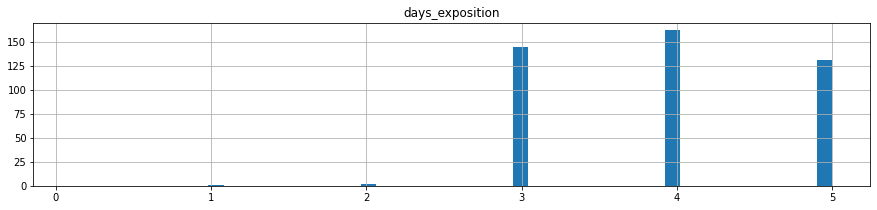

In [111]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0.1,5));

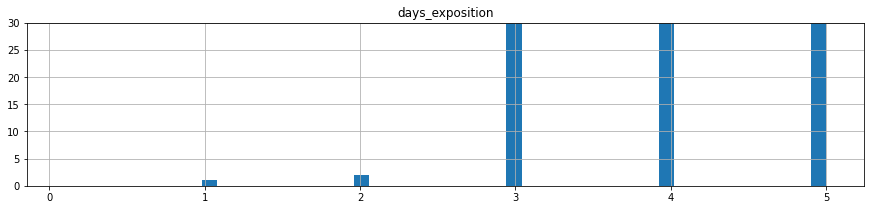

In [112]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0.1,5))
plt.ylim(0,30);

In [113]:
# check
data.rooms.value_counts().to_frame()

,rooms
2,7278
1,6843
3,5058
4,850
5,146
0,44


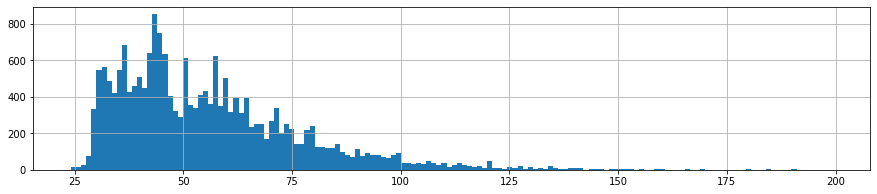

In [114]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

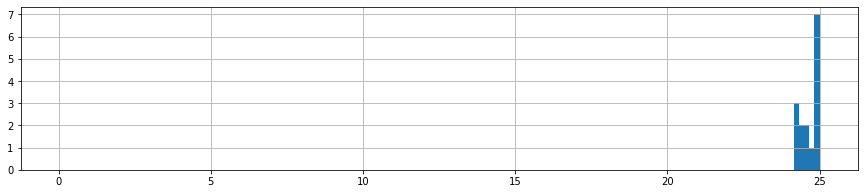

In [115]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (0,25));

In [116]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,29.10,2.50,0.00,"1,050,000.00",13.50,5.00,1.00,2.00
0.5,2.00,51.20,2.67,71.00,"4,550,000.00",30.00,9.00,4.00,9.00
0.9,3.00,84.00,2.88,376.00,"9,000,000.00",49.30,14.00,13.00,22.00
0.9976,5.00,149.48,3.40,779.00,"18,911,443.20",90.00,28.45,25.00,27.00


### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра

Посчитали цену одного квадрата на основе последней цены `last_price` и ввели его в отдельный столбец `price_m2`:

In [117]:
data['price_m2'] = data['last_price'] / data['total_area']
data['price_m2'] = round(data.price_m2).astype('int')

#### Месяц публикации объявления

Ввели новый столбец публикации объявления `month`:

In [118]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

#### Год публикации объявления

Ввели новый столбец год публикации объявления `year`:

In [119]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

#### День публикации объявления

Ввели новый столбец день публикации объявления `weekday`:

In [120]:
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

#### Тип этажа квартиры

Расчитали тип этажа квартиры `type_floor`:

In [121]:
data['floors_total'] = data['floors_total'].astype('int')

In [122]:
def typing_floor(df_line):
    try:
        if df_line['floor'] == 1:
            return 'первый'
        elif df_line['floor'] == df_line['floors_total']:
            return 'последний'
        elif df_line['floor'] > 1 and df_line['floor'] < df_line['floors_total']:
            return 'другой'
    except:
        print('Неверные данные!')

In [123]:
data['type_floor'] = data.apply(typing_floor, axis=1)

#### Расстояние в км до центра города

Расчитали расстояние в км до центра города `cityCenters_nearest_km`:

In [124]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).astype('int')

Не забыли, что столбец вместо пропусков содержит в себе нули

### Проведите исследовательский анализ данных

#### Анализ общей площади

Первым делом посмотрели на гистограмму распределений значений

<AxesSubplot:>

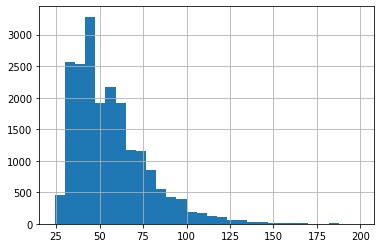

In [125]:
data['total_area'].hist(bins=30)

Гистограмма похожа на распределение Пуасонна на пике количества значений - около 40м2, 3300 объектов.

Далее, построили график рассеяния, чтобы понаблюдать как цена общая площадь влияет на цену

<AxesSubplot:xlabel='[total_area]', ylabel='[last_price]'>

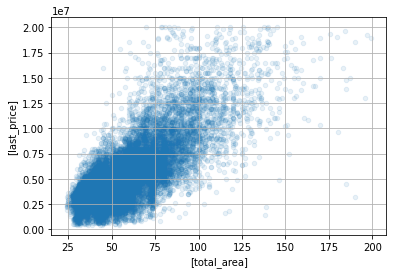

In [126]:
data.plot(x=['total_area'], y=['last_price'], kind='scatter', alpha=0.1, grid=True)

В основной массе наблюдается линейная зависимость, есть выбросы как с одной стороны так и с другой, так есть объекты с общей площадью 180м2, по цене 3 млн руб. Для того чтобы отследить зависимость более точно, посчитали коэффициент корреляции Пирсона:

In [127]:
data['total_area'].corr(data['last_price'])

0.7544347490520459

Наблюдали высокий уровень корреляции, чтобы увидеть зависимость более линейно, постарались отбросить выбросы по цене и площади, построили график рассеяния по агрегированным значениям - по медианам цены для общей площади

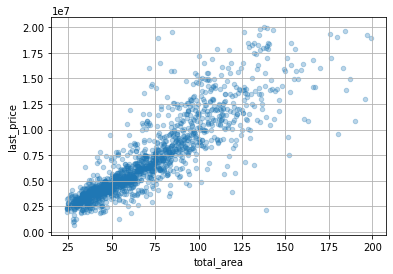

In [128]:
(
    data
    .pivot_table(index='total_area', values='last_price', aggfunc='median')
    .reset_index()
    .plot(x='total_area', y='last_price', kind='scatter', grid=True, alpha=0.3)
);

#### Анализ жилой площади

Первым делом посмотрели на гистограмму распределений значений

<AxesSubplot:>

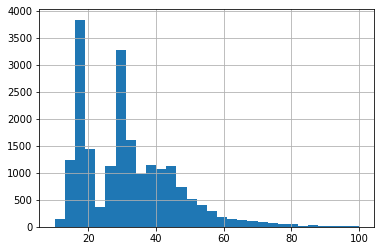

In [129]:
data['living_area'].hist(bins=30)

Гистограмма могла бы быть похожа на распределение Пуасонна, но заметны сильные просадки на уровне количества значений - около 500 объектов, жилая площадь около 20-25м2.

Далее, построили график рассеяния, чтобы понаблюдать как цена жилая площадь влияет на цену

<AxesSubplot:xlabel='[living_area]', ylabel='[last_price]'>

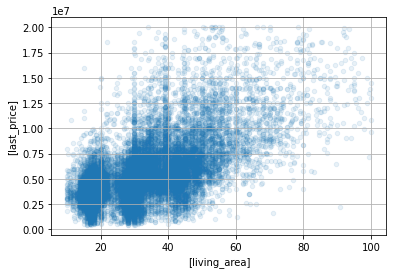

In [130]:
data.plot(x=['living_area'], y=['last_price'], kind='scatter', alpha=0.1, grid=True)

Заметна очень слабая линейная зависимость, посмотрим на график рассеяния на основе агрегированных значений - медианы цены для каждой группы жилой площади:

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

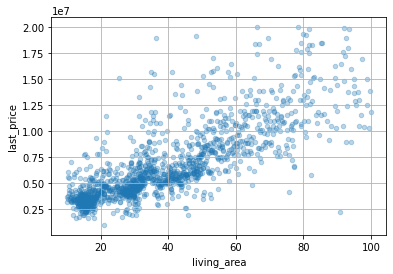

In [131]:
(
    data
    .pivot_table(index='living_area', values='last_price', aggfunc='median')
    .reset_index()
    .plot(x='living_area', y='last_price', kind='scatter', grid=True, alpha=0.3)
)

Агрегировав значения, получили более точную диаграмму рассеяния, увидели более четкую картину линейной зависимости. Однако, линейная зависимость неоднозначна, так как идет под определенным углом. Посчитаем коэффициент корреляции Пирсона:

In [132]:
data['living_area'].corr(data['last_price'])

0.6255337979330994

Заметная корреляция есть, но она меньше чем в предыдущем пункте

#### Анализ площади кухни

Первым делом посмотрели на гистограмму распределений значений

<AxesSubplot:>

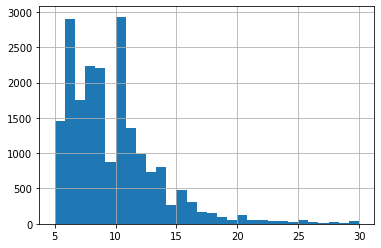

In [133]:
data['kitchen_area'].hist(bins=30)

Гистограмма могла бы быть похожа на распределение Пуасонна, но заметны сильные просадки на уровне количества значений - около 1000 объектов, площадь кухни около 7м2.

Далее, построили график рассеяния, чтобы понаблюдать как цена жилая площадь влияет на цену

<AxesSubplot:xlabel='[kitchen_area]', ylabel='[last_price]'>

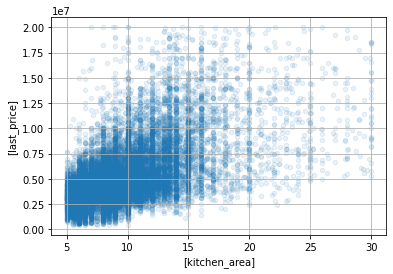

In [134]:
data.plot(x=['kitchen_area'], y=['last_price'], kind='scatter', alpha=0.1, grid=True)

Заметна очень слабая линейная зависимость, посмотрим на график рассеяния на основе агрегированных значений - медианы цены для каждой группы площади кухни:

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

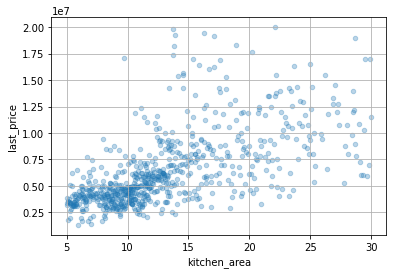

In [135]:
(
    data
    .pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
    .reset_index()
    .plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, alpha=0.3)
)

Агрегировав значения, получили несколько более точную диаграмму рассеяния, увидели более неясную картину очень слабой линейной зависимости. Линейная зависимость весьма неоднозначна, так как не видно четкой картины. Посчитали коэффициент корреляции Пирсона:

In [136]:
data['kitchen_area'].corr(data['last_price'])

0.5604669330431419

Корреляция есть, но она меньше чем в двух других пунктах

#### Цена объекта

Первым делом посмотрели на гистограмму распределений значений

<AxesSubplot:>

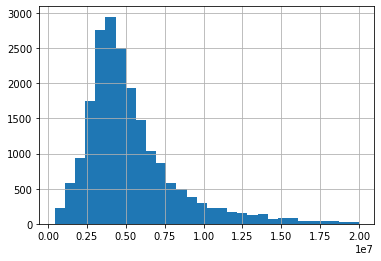

In [137]:
data['last_price'].hist(bins=30)

Гистограмма похожа на распределение Пуасонна на пике количества значений - около 3.5 млн руб, 3300 объектов.

Выбросов в данном столбце не наблюдается, и, так как мы исследуем цену в зависимости от других столбцов пошли далее.

#### Количество комнат

Первым делом посмотрели на гистограмму распределений значений

<AxesSubplot:>

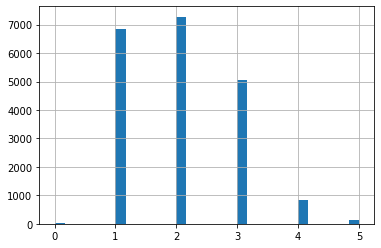

In [138]:
data['rooms'].hist(bins=30)

Более всего квартир продаются с комнатами не более трех. Ожидаем увидеть линейную зависимость от цены, построим график линейной зависимости:

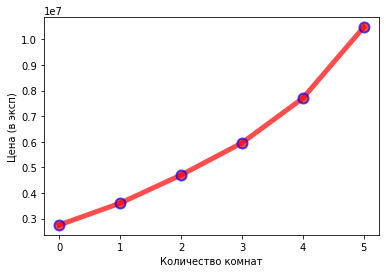

In [139]:
median_price_room = \
(
    data
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    .reset_index()
)

x = median_price_room['rooms']
y = median_price_room['last_price']

plt.xlabel('Количество комнат')
plt.ylabel('Цена (в эксп)')
plt.plot(x, y, 'o-r', alpha=0.7, label="first", lw=5, mec='b', mew=2, ms=10)

Получили, что ожидали - четкую зависимость, однако зависимость не зависимость не стопроцентно линейная, чтобы увидеть более точную цифру, посчитали коэффициент корреляции Пирсона:

In [140]:
median_price_room['rooms'].corr(median_price_room['last_price'])

0.9761437866468025

Положительная корреляция на очень высоком уровне по агрегированным значениям. Однако, может не все так однозначно, если посмотреть детальнее на данные то можно увидеть на графике рассеяния большое количество объектов с большим кол-вом комнат и по низкой цене:

<AxesSubplot:xlabel='[rooms]', ylabel='[last_price]'>

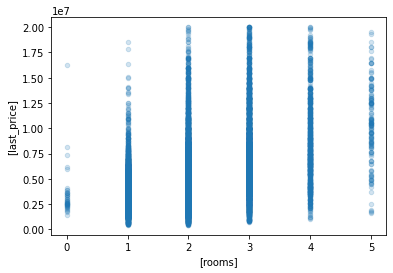

In [141]:
data.plot(x=['rooms'], y=['last_price'], kind='scatter', alpha=0.2)

А теперь расчитали коэффициент корреляции Пирсона по этим данным:

In [142]:
data['rooms'].corr(data['last_price'])

0.466575331010153

Увидели, что корреляция все также положительна, но находится не на столь высоком уровне как при агрегированных значениях. Вероятно, это связано с классом жилья, но так как категоризация в данном исследовании производилась в основном опираясь на общую площадь и количество комнат то проведя исследования отдельно по категориям мы можем получить какую-нибудь 2-х комнатнтую "сталинку" без домофона и прочих благ, но огромную по размерам, в высоком классе жилья, а квартира с охраняемой парковкой и консьержем, но меньшей по площади в более низком классе. Можно добавить в категоризацию еще один фактор из датасета - цену, но это вряд ли возможно так как наша цель - исследование параметров для построения автоматической системы которая будет отслеживать мошеннические действия, а так как мошенничество связано в основном с деньгами, то есть с ценой мы не можем брать в расчет этот параметр, необхомо больше параметров, таких как:

- Наличие охраняемой парковки
- Наличие коньсержа
- Наличие шлагбаума (охраняемой зоны)
- Прочие параметры определяющие истинный класс жилья...

#### Высота потолков

Первым делом посмотрели на гистограмму распределений значений

<AxesSubplot:>

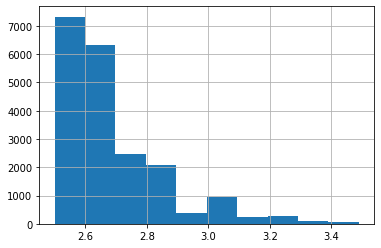

In [143]:
data['ceiling_height'].hist(bins=10)

Заметны просадки при высоте потолков около 2.7м, вероятно это связано с типовой постройкой, возможно в датасете тип строений где высота стандартна - 2.7м находится в меньшинстве, так как далее снова высокое количество объявлений где у застройщиков популярны стандартные высоты потолков около 2.7м. Более всего объектов с высотой потолков около 2.5м

Определим степень зависимости высоты от цены, для начала построили график рассеяния:

<AxesSubplot:xlabel='[ceiling_height]', ylabel='[last_price]'>

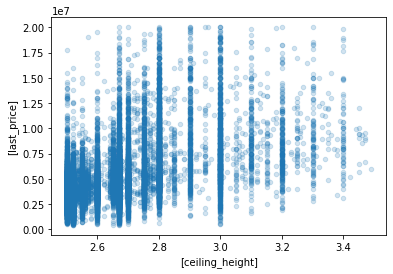

In [144]:
data.plot(x=['ceiling_height'], y=['last_price'], kind='scatter', alpha=0.2)

Какой-либо зависимости не наблюдается, рассчитаем коэффициент корреляции Пирсона по этим данным:

In [145]:
data['ceiling_height'].corr(data['last_price'])

0.4951926842422104

Слабая положительная корреляция, построили график рассеяния по агрерированным значениям высоты потолков

<AxesSubplot:xlabel='ceiling_height', ylabel='last_price'>

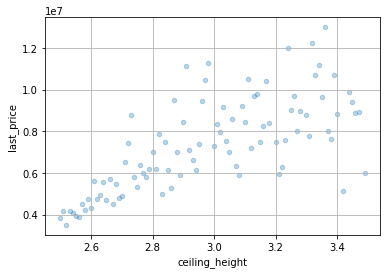

In [146]:
median_price_ceiling_height = (
    data
    .pivot_table(index='ceiling_height', values='last_price', aggfunc='median')
    .reset_index()
)
median_price_ceiling_height.plot(x='ceiling_height', y='last_price', kind='scatter', grid=True, alpha=0.3)

Увидели более линейную зависимость, а теперь рассчитали коэффициент корреляции Пирсона по этим данным:

In [147]:
median_price_ceiling_height['ceiling_height'].corr(median_price_ceiling_height['last_price'])

0.7110703527234356

Ожидаемо получили достаточно высокую положительную корреляцию и можно сказать: чем выше потолки, тем выше цена в медиане.

#### Этаж квартиры

Первым делом посмотрели на гистограмму распределений значений

<AxesSubplot:>

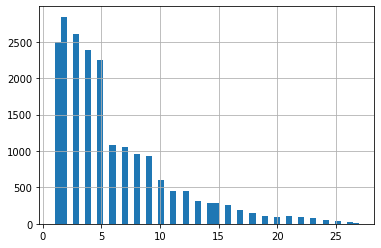

In [148]:
data['floor'].hist(bins=50)

Большинство объектов находятся не выше 5 этажа, ступенчатость гистаграммы можно объяснить типовой застройкой, высоток в данном датасете меньшинство. Определим степень зависимости от цены

<AxesSubplot:xlabel='[floor]', ylabel='[last_price]'>

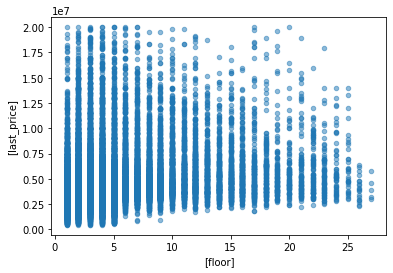

In [149]:
data.plot(x=['floor'], y=['last_price'], kind='scatter', alpha=0.5)

Зависимости не наблюдается. Рассчитаем коэффициент корреляции Пирсона по этим данным:

In [150]:
data['floor'].corr(data['last_price'])

0.12421219996574454

Агрегируем значения по медианной цены для этажа

<AxesSubplot:xlabel='floor', ylabel='last_price'>

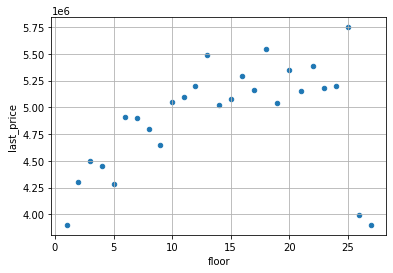

In [151]:
median_price_floor = (
    data
    .pivot_table(index='floor', values='last_price', aggfunc='median')
    .reset_index()
)
median_price_floor.plot(x='floor', y='last_price', kind='scatter', grid=True)

Рассчитаем коэффициент корреляции Пирсона по этим данным:

In [152]:
# check
(
    data
    .pivot_table(index='floor', values='last_price', aggfunc='count')
    .reset_index()
).tail(7)

,floor,last_price
20,21,102
21,22,93
22,23,80
23,24,52
24,25,32
25,26,19
26,27,5


In [153]:
median_price_floor['floor'].corr(median_price_floor['last_price'])

0.3700996885699489

При агрегированных данных по цене для этажа объекта корреляция выросла значительно

#### Тип этажа квартиры

Первым делом посмотрели на гистограмму распределений значений

<AxesSubplot:>

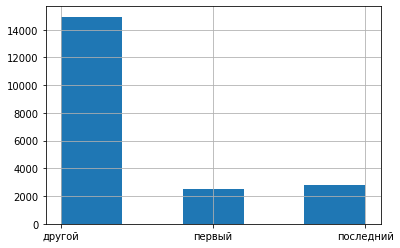

In [154]:
data['type_floor'].hist(bins=5)

Большинство объектов находятся на другом этаже.

Агрегировали значения и пострили барплоты:

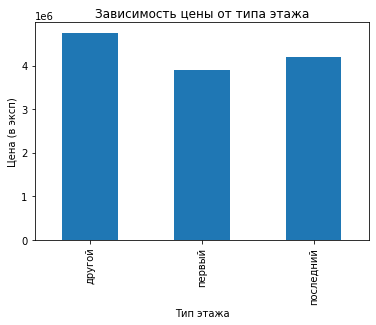

In [155]:
median_price_floor = (
    data
    .pivot_table(index='type_floor', values='last_price', aggfunc='median')
    .reset_index()
)
median_price_floor.plot(x='type_floor',
                        y='last_price',
                        kind='bar',
                        xlabel= 'Тип этажа',
                        ylabel = 'Цена (в эксп)',
                        title = 'Зависимость цены от типа этажа',
                        legend=False
                        );

Наиболее недорогие объекты находятся на первом этаже

#### Общее количество этажей в доме

Рассмотрели общее количество этажей в доме.

Сначала построили гистограмму:

<AxesSubplot:>

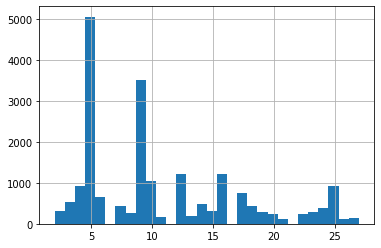

In [156]:
data['floors_total'].hist(bins=30)

Увидели, что чем выше этажность дома тем меньше объявлений. Самое большое количество объявлений находятся для объектов в 5-этажных домах.

Посмотрели зависит ли цена от этажности дома, построили график рассеяния:

<AxesSubplot:xlabel='floors_total', ylabel='last_price'>

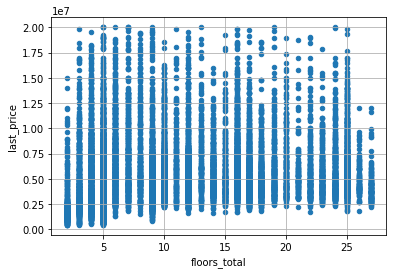

In [157]:
data.plot(x='floors_total', y='last_price', kind='scatter', grid=True)

Линейной зависимости не наблюдается.

Рассчитаем коэффициент корреляции Пирсона:

In [158]:
data['floors_total'].corr(data['last_price'])

0.17008900204070032

Корреляция незначительна.

#### Расстояние до центра города в метрах

Первым делом посмотрели на гистограмму распределений не нулевых значений

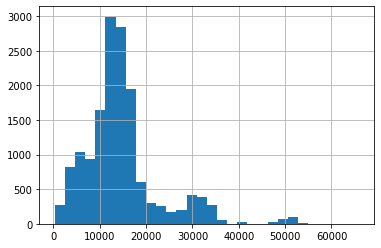

In [159]:
data[data['cityCenters_nearest'] != 0]['cityCenters_nearest'].hist(bins=30);

Большинство объектов, в которых указано расстояние до центра в датасете, находятся в радиусе 18-20км от центра.

Построили график рассеяния в зависимости от цены:

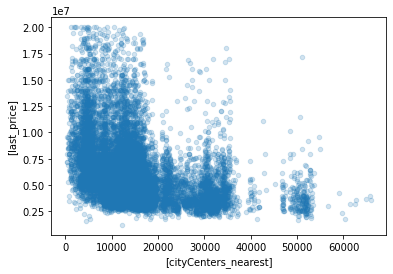

In [160]:
data[data['cityCenters_nearest'] != 0].plot(x=['cityCenters_nearest'], y=['last_price'], kind='scatter', alpha=0.2);

Вне радиуса 35 км цена достаточно резко падает.

Рассчитали коэффициент корреляции Пирсона по этим данным:

In [161]:
data[data['cityCenters_nearest'] != 0]['cityCenters_nearest'].corr(data[data['cityCenters_nearest'] != 0]['last_price'])

-0.34392716288292324

Увидели слабую отрицательную корреляцию - чем больше расстояние от центра, тем дешевле объект.

Построили график рассеяния по агрегированным данным

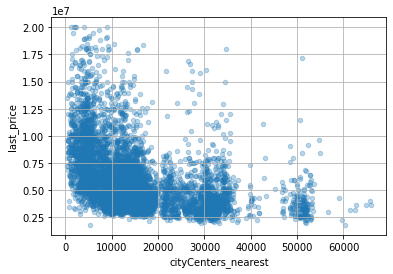

In [162]:
median_cityCenters_nearest = (
    data[data['cityCenters_nearest'] != 0]
    .pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median')
    .reset_index()
)
median_cityCenters_nearest.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True, alpha=0.3);

В целом картина та же, однако, интересено заметить, что цена на большинстве объектов резко падает при расстоянии 20км, затем плавнее стремится к оси Х, также редки объекты на расстоянии от 37 до 47км, наблюдается резкий провал по количеству объявлений.

Рассчитали коэффициент корреляции Пирсона по этим данным:

In [163]:
median_cityCenters_nearest['cityCenters_nearest'].corr(median_cityCenters_nearest['last_price'])

-0.3970172095709053

Отрицательная корреляция не сильно изменилась, благодаря агрегации данных удалось получить меньше выбросов по цене для каждого значения расстояния

#### Расстояние до ближайшего аэропорта

Первым делом посмотрели на гистограмму распределений не пустых значений

<AxesSubplot:>

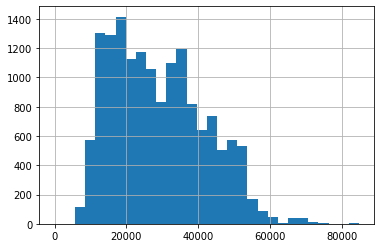

In [164]:
data[~data['airports_nearest'].isna()]['airports_nearest'].hist(bins=30)

Большинство объектов находятся в радиусе 45км до аэропорта.

Построили график рассеяния для определения степени  зависимости:

<AxesSubplot:xlabel='[airports_nearest]', ylabel='[last_price]'>

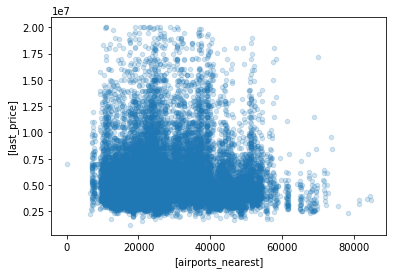

In [165]:
data[~data['airports_nearest'].isna()].plot(x=['airports_nearest'], y=['last_price'], kind='scatter', alpha=0.2)

Зависимости нет.

Рассчитали коэффициент корреляции Пирсона по этим данным:

In [166]:
data[~data['airports_nearest'].isna()]['airports_nearest'].corr(data[~data['airports_nearest'].isna()]['last_price'])

-0.03215859933422099

Корреляция около нуля.

Агрегировали данные и построили график рассеяния:

<AxesSubplot:xlabel='airports_nearest', ylabel='last_price'>

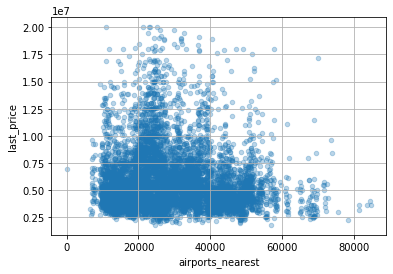

In [167]:
median_price_airports_nearest = (
    data[~data['airports_nearest'].isna()]
    .pivot_table(index='airports_nearest', values='last_price', aggfunc='median')
    .reset_index()
)
median_price_airports_nearest.plot(x='airports_nearest', y='last_price', kind='scatter', grid=True, alpha=0.3)

Зависимости не наблюдается.

Рассчитали коэффициент корреляции Пирсона по этим данным:

In [168]:
median_price_airports_nearest['airports_nearest'].corr(median_price_airports_nearest['last_price'])

-0.06638852309152882

Корреляция увеличилась в три раза после агрегации, но остается на около нулевом уровне.

#### Расстояние до ближайшего парка

Первым делом посмотрели на гистограмму распределений не пустых значений

<AxesSubplot:>

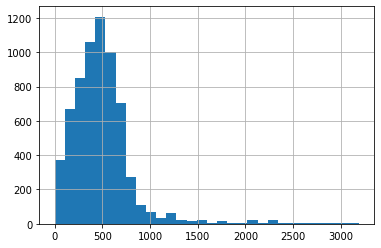

In [169]:
data[~data['parks_nearest'].isna()]['parks_nearest'].hist(bins=30)

Большинство объектов находятся на расстоянии до 700м, самое популярное расстояние в датасете на уровне 500м до парка.

Построили график рассеяния для опредения степени зависимости расстояния от цены:

<AxesSubplot:xlabel='[parks_nearest]', ylabel='[last_price]'>

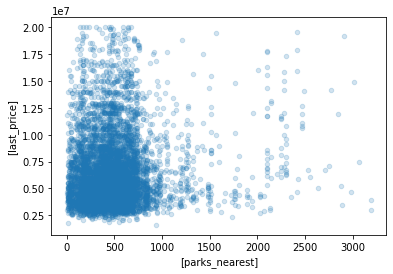

In [170]:
data[~data['parks_nearest'].isna()].plot(x=['parks_nearest'], y=['last_price'], kind='scatter', alpha=0.2)

Увидели, что зависимости не наблюдается.

Расситали коэффициент корреляции Пирсона по этим данным:

In [171]:
data[~data['parks_nearest'].isna()]['parks_nearest'].corr(data[~data['parks_nearest'].isna()]['last_price'])

0.06875892017590222

Корреляция положительная и около нуля.

Агрегировали данные и построили график рассеяния:

<AxesSubplot:xlabel='parks_nearest', ylabel='last_price'>

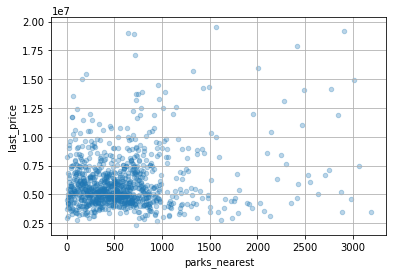

In [172]:
median_price_parks_nearest = (
    data[~data['parks_nearest'].isna()]
    .pivot_table(index='parks_nearest', values='last_price', aggfunc='median')
    .reset_index()
)
median_price_parks_nearest.plot(x='parks_nearest', y='last_price', kind='scatter', grid=True, alpha=0.3)

Зависимости не наблюдается.

Рассчитали коэффициент корреляции Пирсона по этим данным:

In [173]:
median_price_parks_nearest['parks_nearest'].corr(median_price_parks_nearest['last_price'])

0.17586751747229795

Корреляция увеличилась почти в три раза после агрегации, но остается на незначительном уровне.

#### День и месяц публикации объявления

Первым делом посмотрели на гистограмму распределений значений

<AxesSubplot:>

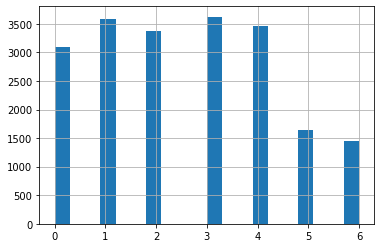

In [174]:
data['weekday'].hist(bins=20)

Увидели, что большинство объявлений публикуются во будние дни.

Построили линейный график с агрерированными значениями - медианной цены по дням, чтобы определить степень зависимости дня от цены:

<AxesSubplot:xlabel='День недели (0-Пн)', ylabel='Цена (эксп)'>

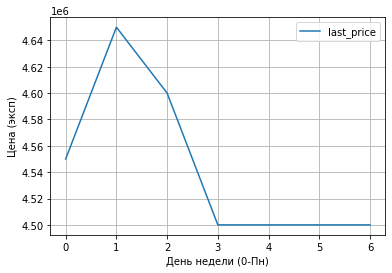

In [175]:
median_price_weekday = (
    data
    .pivot_table(index='weekday', values='last_price', aggfunc='median')
    .reset_index()
)
median_price_weekday.plot(x='weekday', y='last_price', kind='line', grid=True, xlabel='День недели (0-Пн)', ylabel='Цена (эксп)')

Интересное наблюдение: по медианной цене люди чаще публикуют более дешевые объекты к концу недели, чем ближе к выходным тем дешевле.

Рассчитали коэффициент корреляции Пирсона по этим данным:

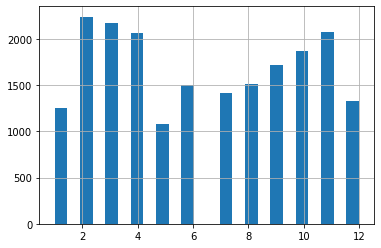

In [176]:
data['month'].hist(bins=24);

Видно, что люди чаще всего публикуют на продажу объекты недвижимости вначале и в конце года, однако в январе и декабре заметны сильные просадки по публикациям, затем резкий рост.

Построим график рассеяния:

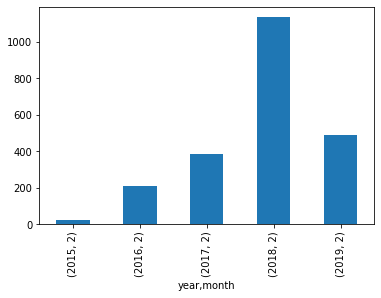

In [177]:
year_feb_counts=(
    data[data['month'] == 2]
    .groupby('year')['month']
    .value_counts()
)
year_feb_counts.plot(x=year_feb_counts.index, y=year_feb_counts.values, kind='bar');

In [178]:
data['day'] = pd.DatetimeIndex(data['first_day_exposition']).day

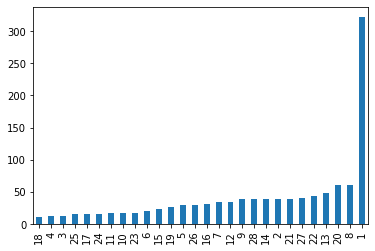

In [179]:
days_feb_counts = \
(
    data[(data['year'] == 2018) & (data['month'] == 2)]['day']
    .value_counts()
    .sort_values(ascending=True)
);
days_feb_counts.plot(x=days_feb_counts.index, y=days_feb_counts.values, kind='bar');

In [180]:
days_feb_counts

18     11
4      13
3      13
25     15
17     15
24     16
11     17
10     17
23     17
6      21
15     24
19     26
5      29
26     30
16     31
7      35
12     35
9      39
28     39
14     39
2      39
21     39
27     41
22     43
13     49
20     60
8      61
1     322
Name: day, dtype: int64

<AxesSubplot:xlabel='month', ylabel='last_price'>

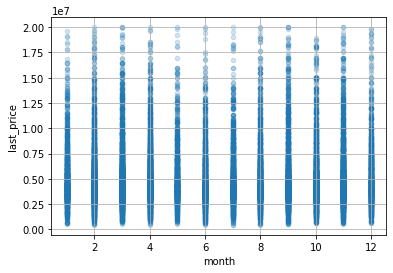

In [181]:
data.plot(x='month', y='last_price', kind='scatter', grid=True, alpha=0.2)

Четкой зависимости не наблюдается

Рассчитали коэффициент корреляции Пирсона по не агрегированным данным:

In [182]:
data['month'].corr(data['last_price'])

0.005902936965789026

Корреляция около нуля

Агрегируем данные по медианной цене месяца и расчитаем коэффициент корреляции Пирсона по этим данным:

In [183]:
median_price_month = (
    data
    .pivot_table(index='month', values='last_price', aggfunc='median')
    .reset_index()
)

median_price_month['month'].corr(median_price_month['last_price'])

0.021043789299204654

По агрегированным данным корреляция увеличилась в десять раз, она положительна, но все также относительно невысока.

#### Год продажи

Расммотрели как год продажи влияет на полную стоимость объекта.

Сначала построили гистограмму для оценки количества по годам:

<AxesSubplot:>

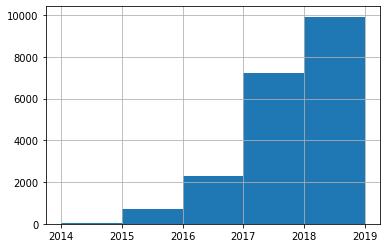

In [184]:
data['year'].hist(bins=5)

Количество объявлений растет с каждым годом, можно связать это с гео-политическими факторами, экономической ситуации в стране, а также с планами правительства увеличивать строительство и введение новых площадей.

Построили барплоты медианы цены по годам, чтобы оценить зависимость цены от года:

<AxesSubplot:xlabel='year'>

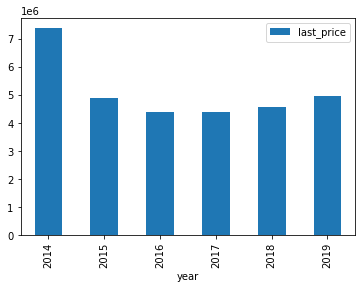

In [185]:
median_price_year = (
    data
    .pivot_table(index='year', values='last_price', aggfunc='median')
    .reset_index()
)
median_price_year.plot(x='year', y='last_price', kind='bar', alpha=1)

Увидели, что медиана цены постепенно падала с 2014 по 2016, в 2017 году не изменилась, затем с каждым годом росла.

Рассчитали коэффициент корреляции Пирсона по агрегированным данным:

In [186]:
median_price_year['year'].corr(median_price_year['last_price'])

-0.6058513740451846

Можно сказать, что корреляция отрицательная, вероятно, на это повлияло также резкое увеличение предложения с 2014 года по 2019 год, однако, следует помнить, что протятежии последних двух лет в датасете цена росла, при также растущем предложении. Возможно падение цены связано с гео-политической и экономической обстановкой, затем ситуация начала стабилизироваться, поэтмоу нельзя сказать однозначно, что с каждым годом объекты недвижимости с каждым годом теряют в цене из-за отрицательной корреляции, слишком много не учтенных факторов даже в течение одного года.

#### Длительность продаж

Рассмотрели столбец `days_exposition`, показывающий длительность объявления в днях, построили гистограмму для оценки количественных значений:

<AxesSubplot:>

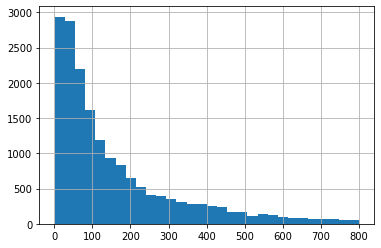

In [187]:
data[data['days_exposition'] != 0]['days_exposition'].hist(bins=30)

Большинство объявлений закрывались в с продолжительностью до 200 дней. Посчитаем среднее и медиану во всем столбце:

In [188]:
data[data['days_exposition'] != 0]['days_exposition'].mean()

155.2816147582987

Среднее время продажи с учетом выбросов - 175-176 дней. Приняли, что продажи продожительностью выше 200 дней считать долгими, так как большинство объявлений закрывались до 200 дней.

Посчитали медиану во всем столбце:

In [189]:
data[data['days_exposition'] != 0]['days_exposition'].median()

92.0

Медианная продолжительность во всем столбце 93 дня, что почти в два раза меньше чем среднее, гистограмма скошена вправо. Приняли, что продажи занимающие продолжительность более чем в два раза меньше медианы - 46 дней, считать быстрыми.

Посчитали количество быстрых и долгих продаж:

In [190]:
data[(data['days_exposition'] != 0) & (data['days_exposition'] < 46)]['days_exposition'].count()

5180

Количество быстрых продаж - 4719.

In [191]:
data[data['days_exposition'] > 200]['days_exposition'].count()

4633

<AxesSubplot:>

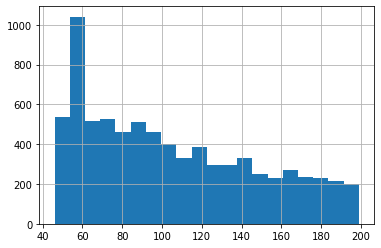

In [192]:
data.query('46 < days_exposition < 200')['days_exposition'].hist(bins=20)

Взяли отрезок длительности от 46 до 200 дней и посчитали сколько записей в нем.

In [193]:
data.query('46 < days_exposition < 200')['days_exposition'].count()

7729

Количество долгих продаж - 7125.

В среднем продажа квартиры занимает от 46 до 200 дней, за это время продалось почти половина от имеющегося датасета - 8229, с учетом пропусков (нули в количестве дней), даже более половины.

#### Цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Сначала выделили в отдельный датасет 10 населенных пунктов с наибольшим числом объявлений:

In [194]:
y_top = data['locality_name_lower'].value_counts()[:10].sort_values(ascending=True)
top_10 = data[data['locality_name_lower'].isin(y_top.index)].reset_index()
len(top_10['locality_name_lower'].unique())

10

Убедились, что в новом датасете 10 населенных пунктов.

Рассмотрели гистограмму:

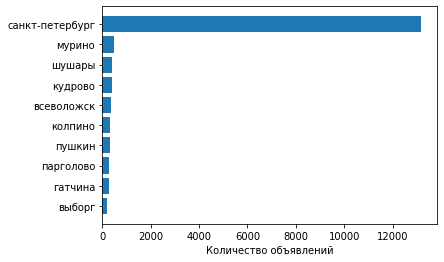

In [195]:
plt.xlabel('Количество объявлений')
plt.barh(y_top.index, y_top.values);

Рассчитали среднюю цену одного квадрата в этом датасете:

In [196]:
round(top_10['price_m2'].mean(), 2)

102675.64

Средняя цена чуть более 194 тыс руб. (при стандартом отклонении около 78 тыс при оценке числовых значений).

Выделили из топ-10 по количеству объявлений населенные пункты с самой высокой ценой квадратного метра и с самой низкой:

In [197]:
top_10.loc[(top_10['price_m2'].idxmax() == top_10.index), 'locality_name']

3226    Санкт-Петербург
Name: locality_name, dtype: object

In [198]:
top_10['price_m2'].max()

355556

Более 3 млн руб за м2, самая высокая цена в топ-10, объект в Санкт-Петербурге

In [199]:
top_10.loc[(top_10['price_m2'].idxmin() == top_10.index), 'locality_name']

16060    Гатчина
Name: locality_name, dtype: object

In [200]:
top_10['price_m2'].min()

10507

Самая низкая цена - 24 тыс за м2, объект также в Санкт-Петербурге. Не удивительно, ведь около 15 тыс объявлений размещены в этом городе, подавляющее большинство, во всех остальных не более 500 объявлений.

Далее, сгруппировали и вывели ТОП-10 по средней цене квадратного метра в сводной таблице:

In [201]:
'''
Инициализируем переменную для нашей сводной таблицы, рассчитаем средню цену м2,
переименуем названия колонок установим первую букву заглавной
затем выберем отдельно название Петербурга и установим грамматически правильное название,
также изменим тип данных на целочисленный, чтобы все по красоте
'''
pivot_top_10 = \
(
    top_10
    .pivot_table(index='locality_name_lower', values='price_m2', aggfunc='mean')
    .sort_values(by='price_m2', ascending=False)
    .reset_index()
)
pivot_top_10.columns = ['Наименование', 'Средняя цена за м2']
pivot_top_10['Наименование'] = pivot_top_10['Наименование'].str.capitalize()
pivot_top_10.loc[pivot_top_10['Наименование'] == 'Санкт-петербург', 'Наименование'] = 'Санкт-Петербург'
pivot_top_10['Средняя цена за м2'] = pivot_top_10['Средняя цена за м2'].astype('int')
pivot_top_10

,Наименование,Средняя цена за м2
0,Санкт-Петербург,107657
1,Пушкин,101536
2,Кудрово,94555
3,Парголово,89853
4,Мурино,85141
5,Шушары,78033
6,Колпино,75206
7,Гатчина,68802
8,Всеволожск,66954
9,Выборг,57659


Построили график цены среднего м2 и наименования населенного пункта:

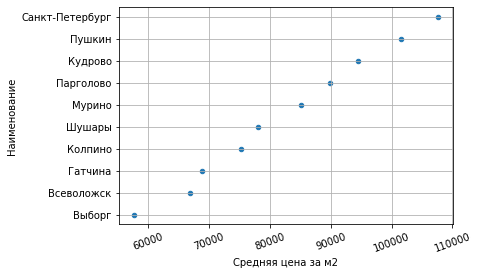

In [202]:
(
    pivot_top_10
    .sort_values(ascending=True, by='Средняя цена за м2')
    .plot(x='Средняя цена за м2', y='Наименование', kind='scatter', style='o-', grid=True, rot=20)
);

<AxesSubplot:ylabel='locality_name_lower'>

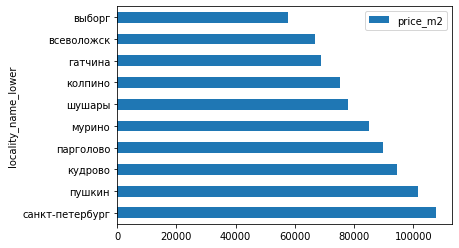

In [203]:
# check
(
    top_10
    .pivot_table(index='locality_name_lower', values='price_m2', aggfunc='mean')
    .sort_values(by='price_m2', ascending=False)
).plot.barh()

#### Средняя цена километра до центра в Санкт-Петербурге

Рассчитали средню цену каждого километра до центра города и выяснили как она влияет на цену объекта.

Сначала выделили Санкт-Петербург в отдельный датасет для анализа:

In [204]:
saint_petersburg = data[data['locality_name'] == 'Санкт-Петербург']

Далее, построили график рассеяния по агрегированным значеням цены по медиане, чтобы минимизировать влияние выбросов

<AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='last_price'>

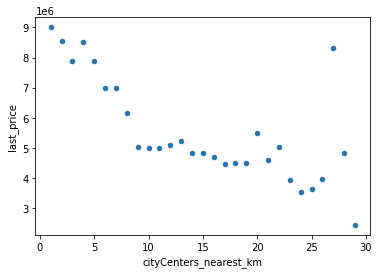

In [205]:
saint_petersburg_median = \
(
    saint_petersburg[saint_petersburg['cityCenters_nearest_km'] != 0]
    .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')
    .reset_index()
)
saint_petersburg_median.plot(x='cityCenters_nearest_km', y = 'last_price', kind='scatter')

Рассчитали корреляцию:

In [206]:
saint_petersburg_median['cityCenters_nearest_km'].corr(saint_petersburg_median['last_price'])

-0.7216900771078474

Увидели, что корреляция отрицательная по агрегированным значениям чем дальше от центра тем меньше стоимость по медиане.

Рассчитали среднюю цену каждого километра:

In [207]:
saint_petersburg['last_price'].mean() / saint_petersburg.loc[saint_petersburg['cityCenters_nearest_km'] != 0, 'cityCenters_nearest_km'].mean()

540243.8134814661

Средняя цена каждого километра удаленности от центра - 516353 руб

Построили линейный график зависимости от удаленности центра:

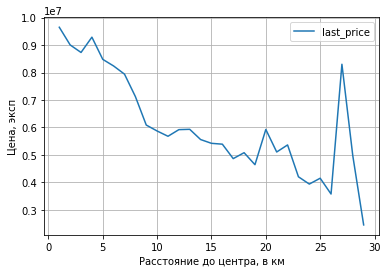

In [208]:
(
    saint_petersburg[saint_petersburg['cityCenters_nearest_km'] != 0]
    .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')
    .reset_index()
    .plot(x='cityCenters_nearest_km', y='last_price', kind='line', grid=True, xlabel='Расстояние до центра, в км', ylabel='Цена, эксп')
);

Вероятно, после 26 километра распологается престижный район, что даже удаленность от центра играет меньшую роль для формирования цены.

Узнали, сколько таких объектов:

In [209]:
saint_petersburg.loc[saint_petersburg['cityCenters_nearest_km'] >= 26]['locality_name_lower'].count()

15

15 объектов, пренебрижимо малое количество, так как всего в выборке более 12 тыс записей, это все не позволяет говорить о системности, скорее исключение

### Общий вывод

Мы обработали полученный архив данных:

- Обработали пропущенные значения
- Заменили типы данных на необходимые для удобной работы
- Посчитали и добавили в таблицу цену квадратного метра жилья
- Вывели из даты дни недели, месяцы и года размещения объявлений
- Изучили следующие параметры на наличие выбивающихся значений

Изучая датасет мы выявили:

- Приемлимые значения продажи квартир варьируются от 46 до 200 дней
- На стоимость квартиры больше всего влияют:
 - Количество комнат (обнаружена функциональная зависимость по шкале Чеддока)
 - Общая, жилая, кухонная площадь квартиры (высокий уровень корреляции от 0.56 До 0.76)
 - Высота потолков в меньшей степени
 - Также в меньшей степени влияет удаленность от центра города
 - День недели влияет на медиану цены (интересное наблюдение)
 - Год продажи
 - Удаленность от центра
 
Видно, что сервис размещения объявлений становится все более популярным, с каждым годом число объявлений увеличивается. В ходе проведения анализа рассчитали среднюю цену километра до центра Санкт-Петербурга в отдельном датасете, изучили как быстро продавались квартиры.

Также, следует отметить, что самые дорогие участки по стоимости квадратного метра находятся в поселке Парголово там средняя цена квадратного метра составляет - 203350 руб, а самые недорогие объекты находятся в Кудрово со средней ценой квадратного метра - 122459 руб. Но не стоит забывать про малочисленность объявлений населенных пунктов отличных от Санкт-Петербурга, в Санкт-Петербурге находится подавляющее большинство всех объявлений (более 12 тысяч) в сравнении с остальными населенными пунктами (в которых не более 500 объявлений).

### Бонус

In [210]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

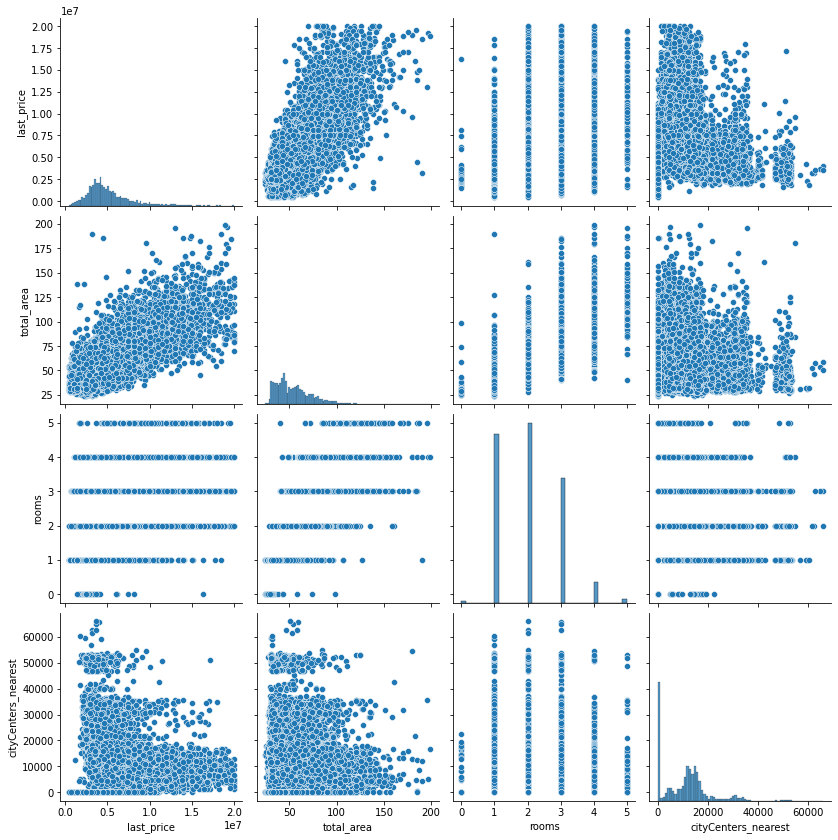

In [211]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])
plt.gcf().set_size_inches(12,12);


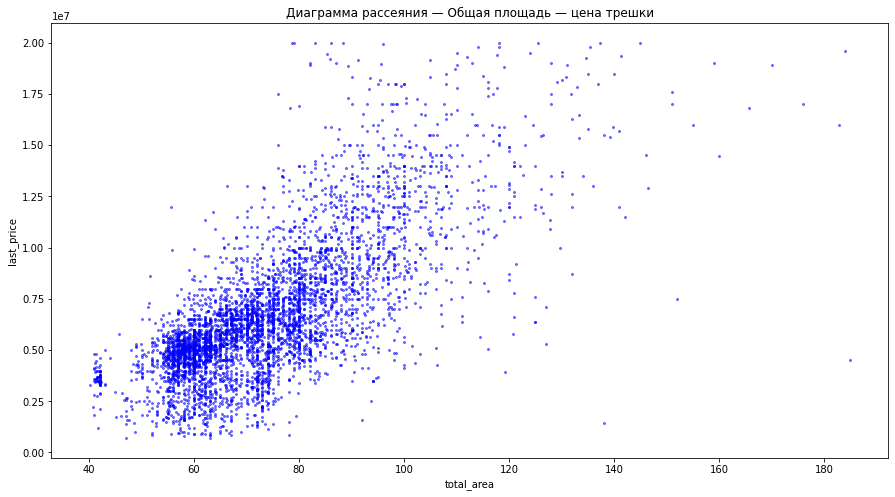

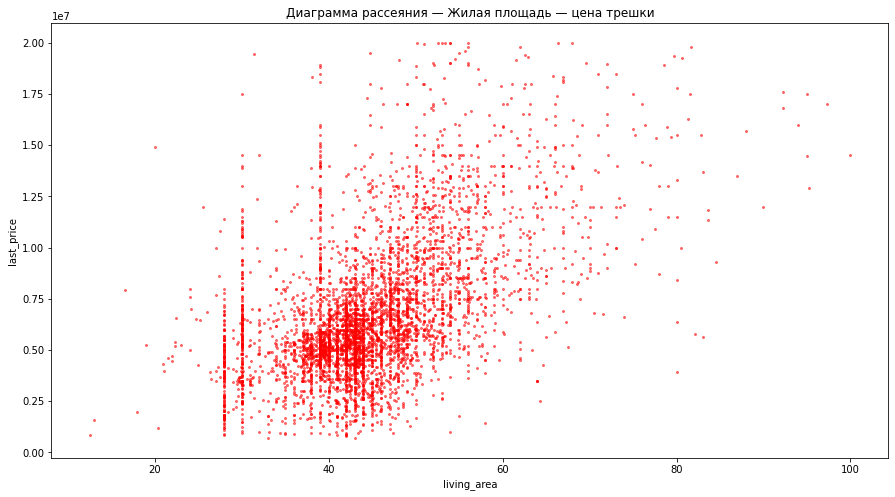

In [212]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

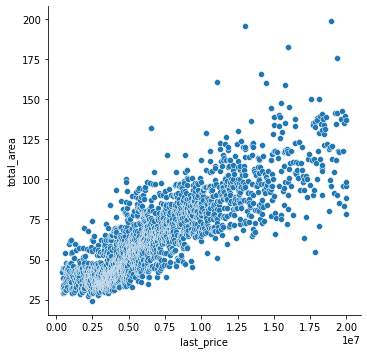

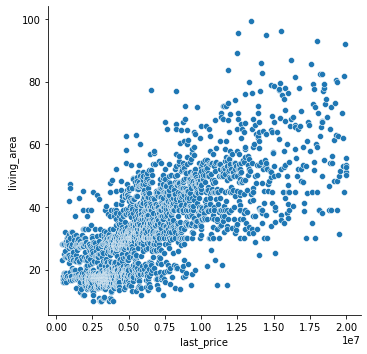

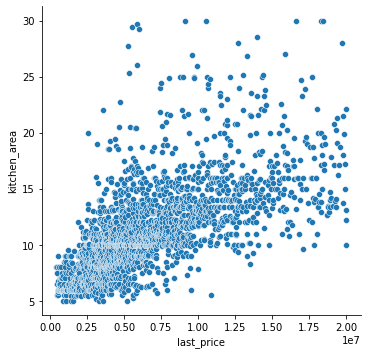

In [213]:
# check
price_pivot_area = data.pivot_table(index='last_price', values=([
    'total_area', 'living_area', 'kitchen_area']), aggfunc='median')
price_pivot_area = price_pivot_area.reset_index()
# Посмотрим на диаграммы рассеяния для столбцов 'total_area', 'living_area', 'kitchen_area'.
for row in ['total_area', 'living_area', 'kitchen_area']:
    sns.relplot(data=price_pivot_area, x='last_price', y=row, kind='scatter')

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [х]  есть общий вывод